In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, cluster, mixture

n_samples = 1000

varied = datasets.make_blobs(n_samples = n_samples, cluster_std=[5, 1, 0.5], random_state=3)

X, y = varied[0], varied[1]

print(X[:5], y[:5])

[[ 8.38036194  7.55495526]
 [-3.69456115  1.22679381]
 [-3.61020201  1.5916035 ]
 [-7.27995229  4.2595052 ]
 [ 1.65243356 15.13177222]] [2 1 1 0 0]


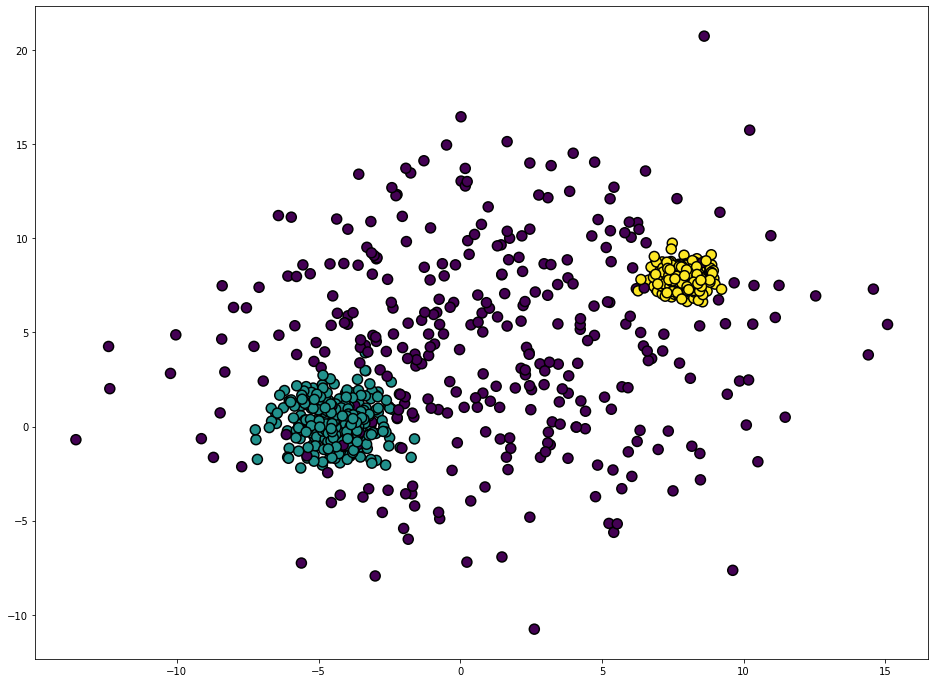

In [4]:
plt.figure(figsize=(16,12))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='black', lw=1.5, cmap=plt.get_cmap('viridis'))
plt.show()

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(X);

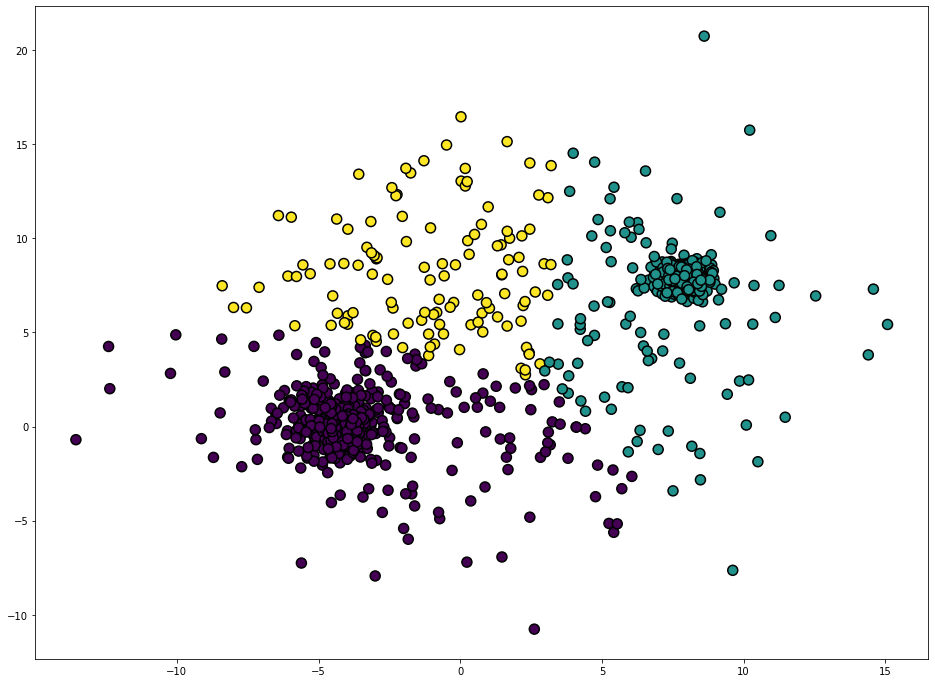

In [6]:
plt.figure(figsize=(16,12))
plt.scatter(X[:, 0], X[:, 1], c=pred, s=100, edgecolor='black', lw=1.5, cmap=plt.get_cmap('viridis'))
plt.show()

In [7]:
gmm = mixture.GaussianMixture(n_components=3)

gmm = gmm.fit(X)

pred_gmm = gmm.predict(X)

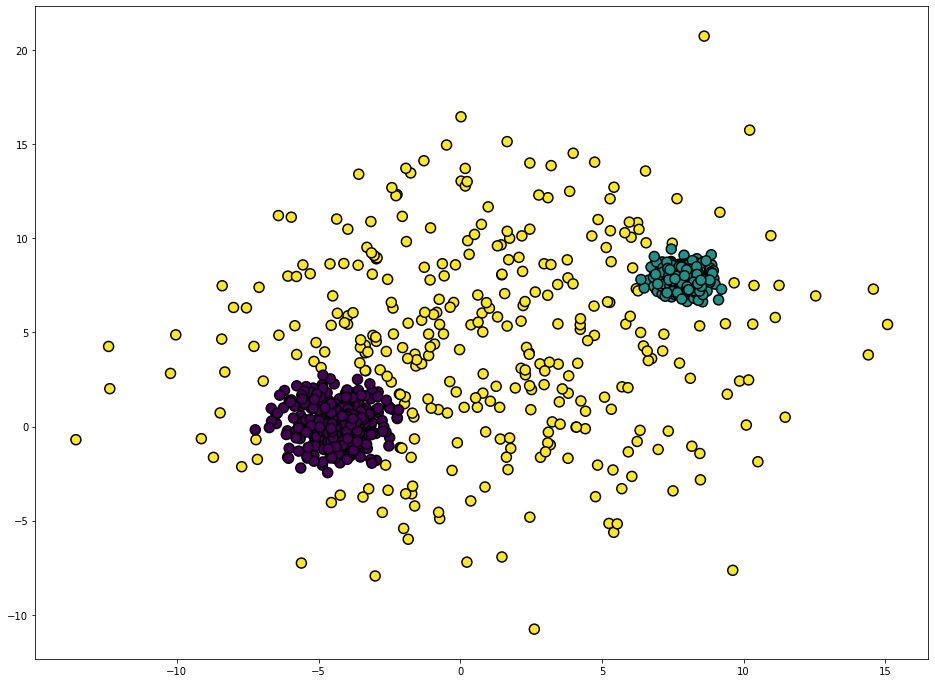

In [8]:
plt.figure( figsize=(16,12))
plt.scatter(X[:,0], X[:,1], c=pred_gmm, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

In [9]:
import seaborn as sb

iris = sb.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


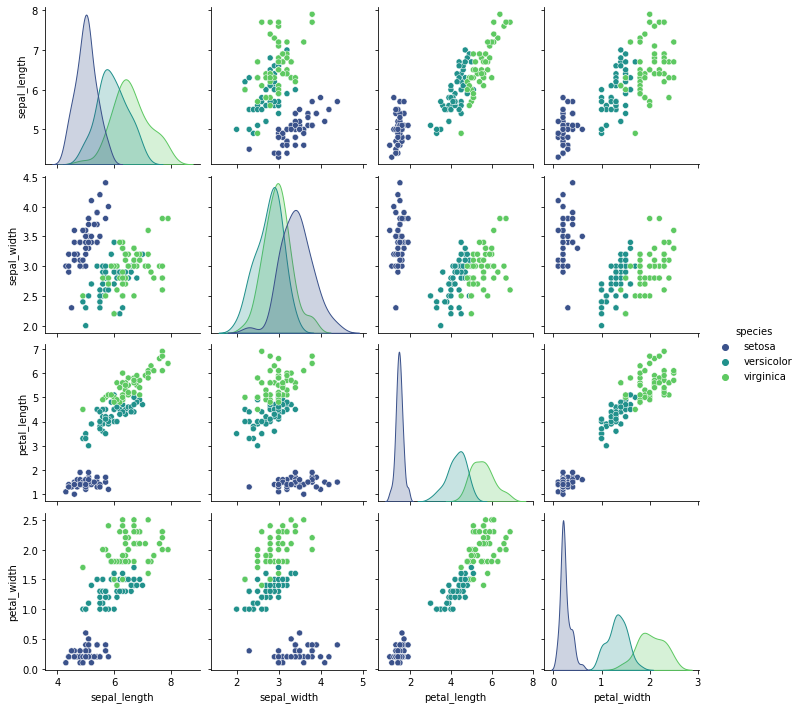

In [10]:
sb.pairplot(iris, hue='species', palette='viridis');

In [11]:
kmeans_iris = KMeans(n_clusters=3)
pred_kmeans_iris = kmeans_iris.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

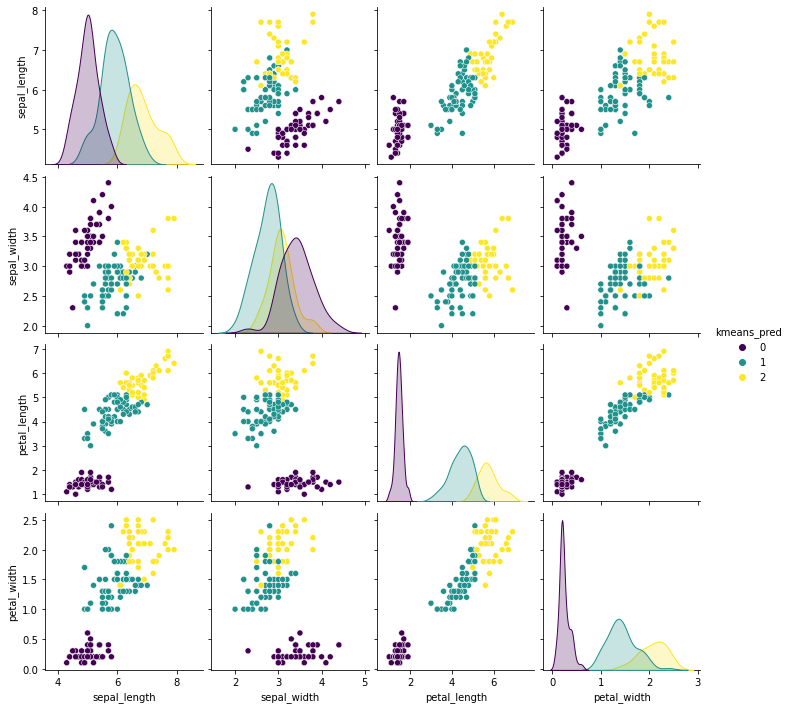

In [12]:
iris['kmeans_pred'] = pred_kmeans_iris

sb.pairplot(iris, hue="kmeans_pred", palette='viridis', vars=['sepal_length','sepal_width','petal_length','petal_width']);

In [13]:
# Import adjusted rand score
from sklearn.metrics import adjusted_rand_score 

# calculate adjusted rand score passing in the original labels and the kmeans predicted labels 
iris_kmeans_score = adjusted_rand_score(iris['species'], iris['kmeans_pred'])

# Print the score
iris_kmeans_score

0.7302382722834697

In [15]:
gmm_iris = mixture.GaussianMixture(n_components=3).fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])
pred_gmm_iris = gmm_iris.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

In [16]:
iris['gmm_pred'] = pred_gmm_iris

# Calculate adjusted rand score passing in the original 
# labels and the GMM predicted labels iris['species']
iris_gmm_score = adjusted_rand_score(iris['species'], iris['gmm_pred'])

# Print the score
iris_gmm_score

0.9038742317748124

In [18]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(iris[['sepal_length','sepal_width','petal_length','petal_width']], pred_gmm_iris)
sil_score

0.5011761635067211

In [19]:
sil_kmeans_score = silhouette_score(iris[['sepal_length','sepal_width','petal_length','petal_width']], pred_kmeans_iris)
sil_kmeans_score

0.5528190123564102